# Problem 5

In [1]:
# Importing relevant packages and doing necessary setup
import cv2
import matplotlib.pyplot as plt
import matplotlib
import PIL
import numpy as np

%matplotlib inline

# for auto-reloading external modules
%load_ext autoreload
%autoreload 2

In [2]:
# Helper function to display multiple images in a plot
def display_images(images, rows, cols, size, title, subtitles):
    fig = plt.figure(figsize = size)
    c = 0
    sz = len(images)
    for i in range(rows):
        for j in range(cols):
            if sz == c:
                break
            ax1 = fig.add_subplot(rows, cols, c + 1)
            ax1.imshow(images[c], cmap = 'gray')
            ax1.set_title(subtitles[c], fontsize = 20)
            c = c + 1
    plt.show()
    # Un comment the below line and comment the above line to save and display
    #plt.savefig('part2.png')

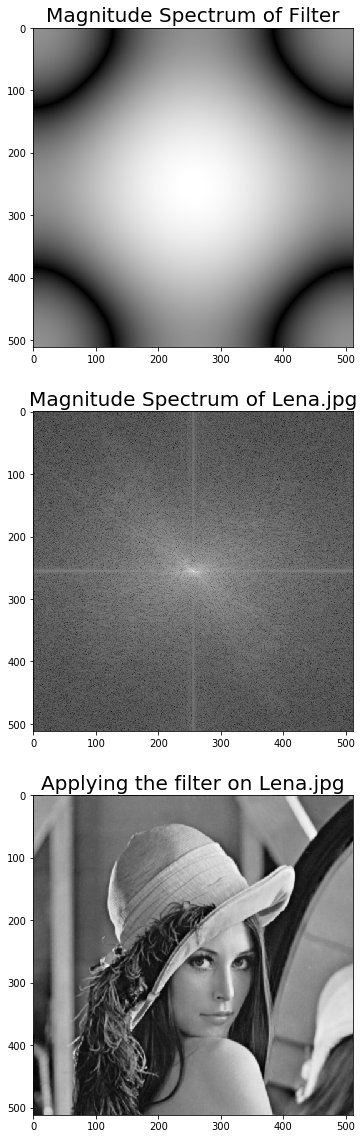

In [3]:
img = np.array([[0, 1, 0], [1, 2, 1], [0, 1, 0]])
img = img.astype(np.float64)
img = np.pad(img, [(0, 512 - img.shape[0]), (0, 512 - img.shape[1])], mode='constant', constant_values=0)

f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)
magnitude_spectrum = np.log(1 + np.abs(fshift))

img = cv2.imread('../input_data/lena.jpg', cv2.IMREAD_GRAYSCALE)
img = np.pad(img, [(0, 512 - img.shape[0]), (0, 512 - img.shape[1])], mode='constant', constant_values=0)
g = np.fft.fft2(img)
gshift = np.fft.fftshift(g)
magnitude_spectrum_g = np.log(1 + np.abs(gshift))
res = np.abs(np.fft.ifft2(f * g))
images = []
subtitles = []
images.append(magnitude_spectrum)
images.append(magnitude_spectrum_g)
images.append(res)
subtitles.append('Magnitude Spectrum of Filter')
subtitles.append('Magnitude Spectrum of Lena.jpg')
subtitles.append('Applying the filter on Lena.jpg')
display_images(images, 3, 1, (20, 20), '', subtitles)

### Observations
- No change was observed visually on the filtered image.
- The frequency spectrum indicates that the filter blocks certain frequencies while allowing all other frequency components to pass